### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [6]:
missing_value = data.isnull().sum()
print('Missing Value in each column:\n', missing_value)

Missing Value in each column:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [7]:
percentage_missing_value = {column: value / len(data) for column, value in missing_value.items()}
percentage_missing_value

{'destination': 0.0,
 'passanger': 0.0,
 'weather': 0.0,
 'temperature': 0.0,
 'time': 0.0,
 'coupon': 0.0,
 'expiration': 0.0,
 'gender': 0.0,
 'age': 0.0,
 'maritalStatus': 0.0,
 'has_children': 0.0,
 'education': 0.0,
 'occupation': 0.0,
 'income': 0.0,
 'car': 0.9914853358561968,
 'Bar': 0.008435824660990224,
 'CoffeeHouse': 0.017108167770419427,
 'CarryAway': 0.011904761904761904,
 'RestaurantLessThan20': 0.010249132765689057,
 'Restaurant20To50': 0.014900662251655629,
 'toCoupon_GEQ5min': 0.0,
 'toCoupon_GEQ15min': 0.0,
 'toCoupon_GEQ25min': 0.0,
 'direction_same': 0.0,
 'direction_opp': 0.0,
 'Y': 0.0}

We can see 99.14% of the values in the 'car' column are missing, indicating a flaw in the data collection process. As a result, I will remove this column. For the remaining columns, which have less than 2% of their values missing, the proportion of missing data is relatively low. Therefore, I will impute the missing values using the most frequent category, i.e., the mode.

In [38]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [39]:
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")

In [40]:
data["age"]=pd.to_numeric(data["age"])

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# drop car column
data = data.drop('car', axis=1)

In [9]:
# update missing value and map ou the name of the missing column (not including car variable anymore)
missing_value = data.isnull().sum()
missing_col = [column for column, value in missing_value.items() if value > 0]

# loop through each column individually and find common value of each column then impute each column individually.

for column in missing_col:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

In [10]:
# check missing value again
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

Looks good, we have handled all the null values.

4. What proportion of the total observations chose to accept the coupon? 



In [12]:
accpt_coupons_prop = data.query('Y== 1')['Y'].count() / data['Y'].count() * 100
accpt_coupons_prop 

56.84326710816777

Around 56.8% of total customers accepted coupons. 

5. Use a bar plot to visualize the `coupon` column.

Text(0, 0.5, 'Counts')

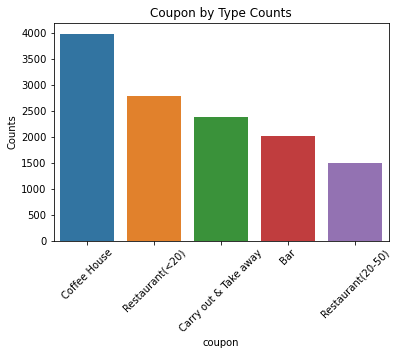

In [16]:
sns.barplot(data = data['coupon'].value_counts().reset_index(), x = 'coupon', y = 'count')
plt.title('Coupon by Type Counts')
plt.xticks(rotation=45)
plt.ylabel('Counts')

Looks the coffee house and restaurant with cheap meals are most popular with highest acceptance. 

6. Use a histogram to visualize the temperature column.

Text(0.5, 6.79999999999999, 'Temperature in °F')

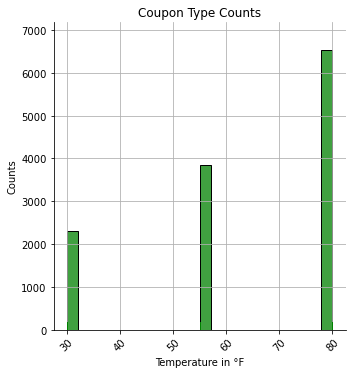

In [18]:
sns.displot(data = data, x = 'temperature', rug=True, color='Green')
plt.grid()
plt.title('Coupon Type Counts')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.xlabel('Temperature in °F')

Most of the coupons were delivered in ambient temperatures between 55 and 80 °F.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
bar_coupons_data = data.query('coupon == "Bar"')
bar_coupons_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


We have 2017 records. 

2. What proportion of bar coupons were accepted?


In [22]:
accpt_bar_coupons_prop = bar_coupons_data.query('Y == 1')['Y'].dropna().count() / bar_coupons_data['Y'].dropna().count() * 100
accpt_bar_coupons_prop

41.00148735746158

Around 41% coupons are accepted. 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Those who went to a bar 3 or fewer times a month

In [31]:
bar_0_to_3_list = ['never', 'less1', '1~3'] 
filtered_count = data.query('Bar in @bar_0_to_3_list & Y == 1')['Bar'].count()
total_count = data['Bar'].count()
proportion = filtered_count / total_count
proportion

0.49850204982655316

In [33]:
filtered_count = data.query("Bar not in @bar_0_to_3_list & Y == 1")["Bar"].count()
total_count = data['Bar'].count()
proportion = filtered_count / total_count
proportion

0.06993062125512457

Those who go to bar less than 4 times are more prone to accept the coupons.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [41]:
bar_1_to_max_list = ['1~3', '4~8', 'gt8'] 
(data.query('Bar in @bar_1_to_max_list & age > 25 & Y == 1' )['Bar'].count() / data['Bar'].count()) * 100

13.60769473352255

In [42]:
count_others = data.query('Y == 1' )['Bar'].count() \
    - data.query('Bar in @bar_1_to_max_list & age > 25 & Y == 1' )['Bar'].count()
(count_others / data['Bar'].count()) * 100

43.23557237464522

Only 13.72% of the total records represent individuals over 25 years old who accepted the coupon and visit a bar more than once a month. In contrast, 43.17% of the total records represent individuals who are either not over 25 years old or do not visit bars frequently, indicating that these people are more likely to accept the coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [43]:
more_than_once = data[
    data['Bar'].isin(['1~3', '4~8', 'gt8']) &
    data['passanger'].isin(['Alone', 'Friend(s)', 'Partner']) &
    ~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])
]['Y'].mean(numeric_only=True)

less_than_once = data[
    data['Bar'].isin(['less1', 'never']) &
    data['passanger'].isin(['Alone', 'Friend(s)', 'Partner']) &
    ~data['occupation'].isin(['Farming', 'Fishing', 'Forestry'])
]['Y'].mean(numeric_only=True)

print(f'The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {round(more_than_once, 3) * 100}% compare to those who goes less than 1 or never: {round(less_than_once, 3) * 100}%')

The acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 62.3% compare to those who goes less than 1 or never: 55.1%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [44]:
driver_group1 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8']) & ~data['passanger'].isin(['Kids']) & ~data['maritalStatus'].isin([['Widowed']]))
    ]['Y'].mean()
driver_group2 = data[
    (~data['Bar'].isin(['never', 'less1']) & ~data['age'].isin(['50plus', '46', '41', '36']))
    ]['Y'].mean()
driver_group3 = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8']) & data['income'].isin(['$37500 - $49999']))
    ]['Y'].mean()

print(f"The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {round(driver_group1, 3) * 100}% OR \n \
The acceptance rate of drivers who go to bars more than once a month and are under the age of 30: {round(driver_group2, 3) * 100}% OR \n \
The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {round(driver_group3, 3) * 100}%")

The acceptance rate of drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 62.2% OR 
 The acceptance rate of drivers who go to bars more than once a month and are under the age of 30: 62.2% OR 
 The acceptance rate of drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 62.9%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

#### Hypothesis: 
The coupon acceptance rate is influenced more by drivers' lifestyle than by demographic factors.

1. Younger Drivers and Lower Income: Younger drivers and those with lower incomes show a slightly higher acceptance rate, most likely due to their interest in social outings.
2. Drivers without Kids and Specific Occupations: Drivers without children and those in certain occupations also illustrate a higher rate of accepting coupons.

**Conclusion**: The acceptance rate is not merely a matter of chance but is a nuanced derivative of drivers' social habits, economic status, and life circumstances. Those who already enjoy bar life are more inclined toward accepting coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

***1. Let's observe the frequency of acceptance based on the frequency of dinning out between cheap and more fine dinning restaurant.***

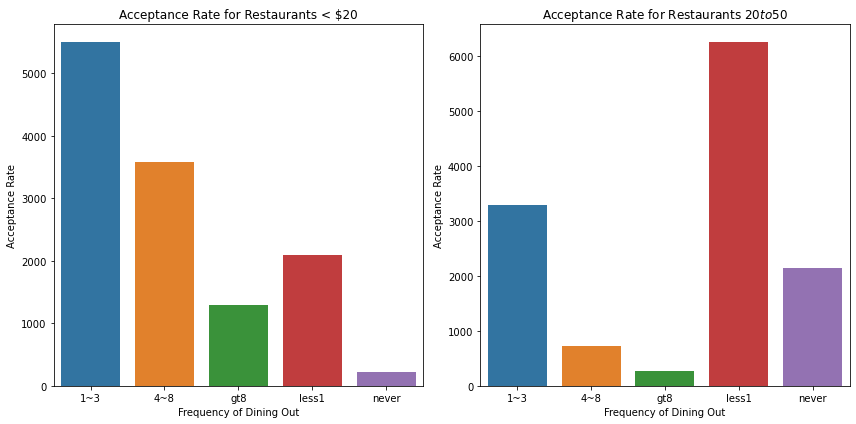

In [46]:
data['Accepted'] = data['Y'] == '1'
acceptance_rate_less_than_20 = data.groupby('RestaurantLessThan20')['Accepted'].count().reset_index()

# Visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='RestaurantLessThan20', y='Accepted', data=acceptance_rate_less_than_20)
plt.title('Acceptance Rate for Restaurants < $20')
plt.xlabel('Frequency of Dining Out')
plt.ylabel('Acceptance Rate')

acceptance_rate_20_to_50 = data.groupby('Restaurant20To50')['Accepted'].count().reset_index()

plt.subplot(1, 2, 2)
sns.barplot(x='Restaurant20To50', y='Accepted', data=acceptance_rate_20_to_50)
plt.title('Acceptance Rate for Restaurants $20 to $50')
plt.xlabel('Frequency of Dining Out')
plt.ylabel('Acceptance Rate')

# automatic function to layout the subplot for easier visibility
plt.tight_layout()
plt.show()

For both inexpensive and expensive restaurants, we observe that drivers visit less frequently (13 times, 48 times, or less than once). This suggests that these drivers likely have lower incomes. This observation reinforces the hypothesis that individuals with lower incomes are more inclined to accept coupons to receive discounts and save money.

***2. Does the income is the key factor affect the acceptance rate?***

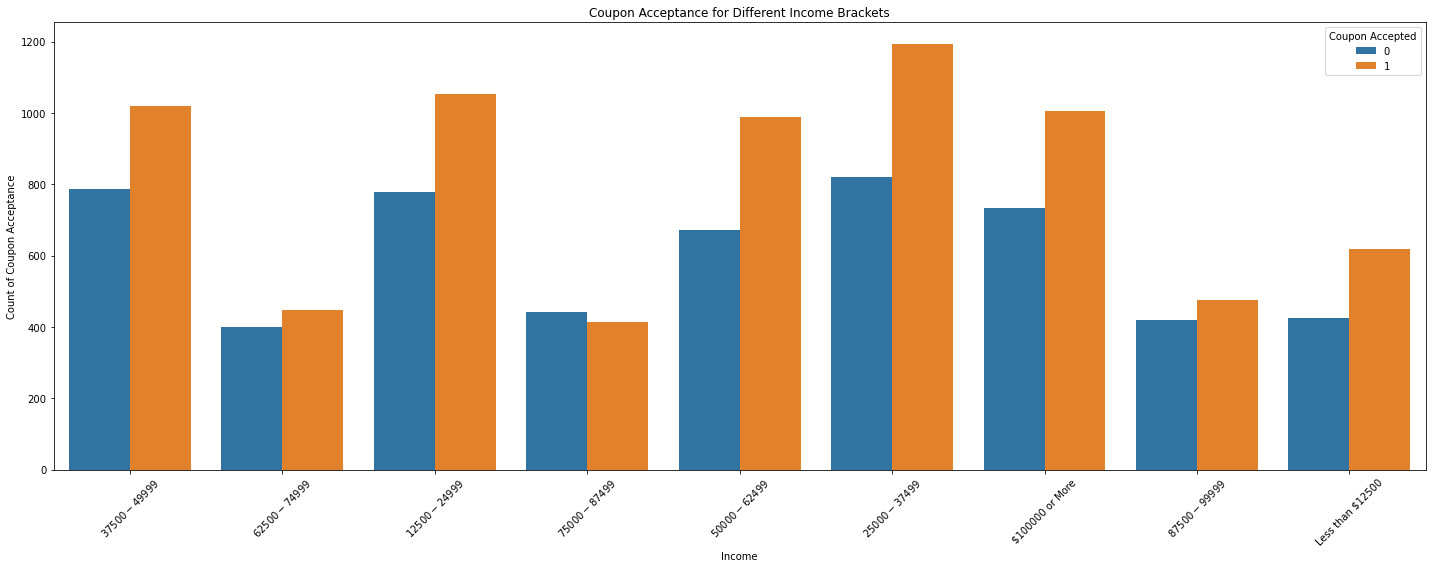

In [47]:
# choose a big figure for visibility
plt.figure(figsize=(20, 8))

sns.countplot(x='income', hue='Y', data=data)

plt.title('Coupon Acceptance for Different Income Brackets')
plt.xlabel('Income')
plt.ylabel('Count of Coupon Acceptance')

# rotate the x-axis for readability
plt.xticks(rotation=45)
plt.legend(title='Coupon Accepted', loc='upper right')  #
plt.tight_layout()
plt.show()

In this graph, we observe that individuals with lower incomes tend to have higher acceptance rates for coupons. This supports our hypothesis that low-income individuals are more likely to accept coupons to receive discounts and save money.

Interestingly, we also notice that high-income individuals (those earning more than $100k) exhibit a high acceptance rate as well. This could be due to their desire to save even more money. They likely have the leisure to frequent bars and take advantage of coupon offers without financial worries.

***3. Is age the key factor affecting on coupon acceptance rate?***

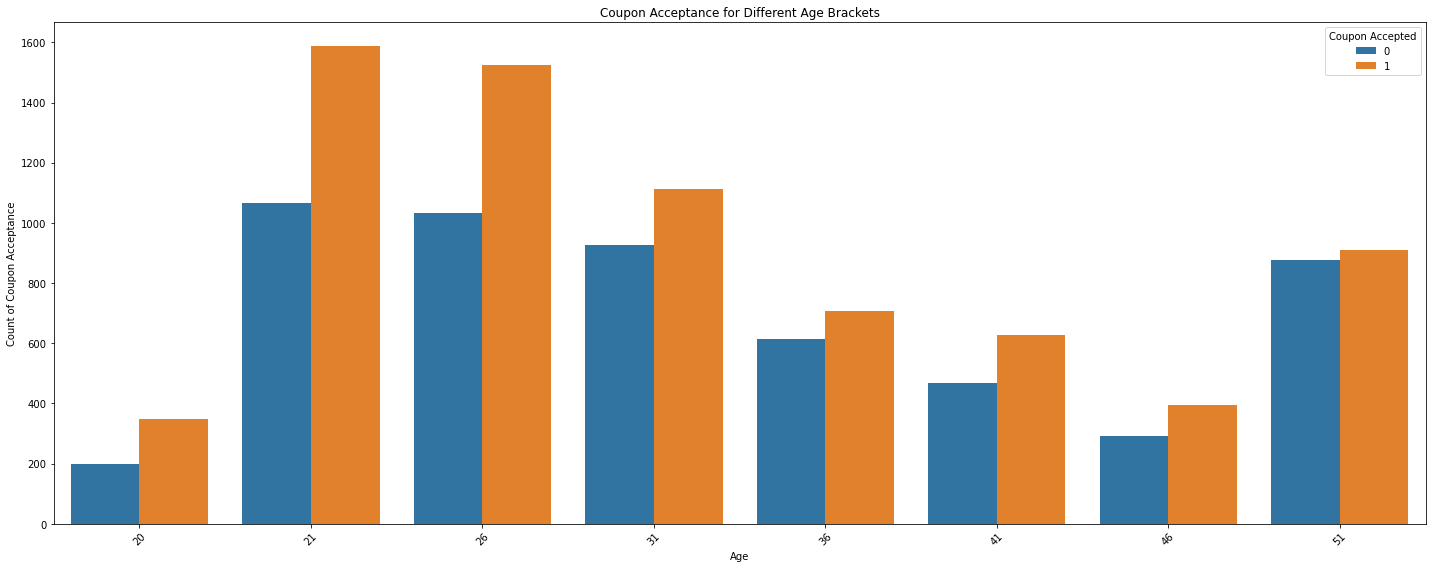

In [49]:
# choose a big figure for visibility
plt.figure(figsize=(20, 8))

sns.countplot(x='age', hue='Y', data=data)

plt.title('Coupon Acceptance for Different Age Brackets')
plt.xlabel('Age')
plt.ylabel('Count of Coupon Acceptance')

# rotate the x-axis for readability
plt.xticks(rotation=45)
plt.legend(title='Coupon Accepted', loc='upper right')
plt.tight_layout()
plt.show()

This graph reinforces our earlier hypothesis that young individuals tend to accept more coupons, whether they are poor or very wealthy. Young people, regardless of their financial extremes, exhibit higher acceptance rates.

Another point to note is the very low acceptance rate among those below 21, likely due to legal restrictions.

***4.Would occupation affecting the rate of acceptance?***

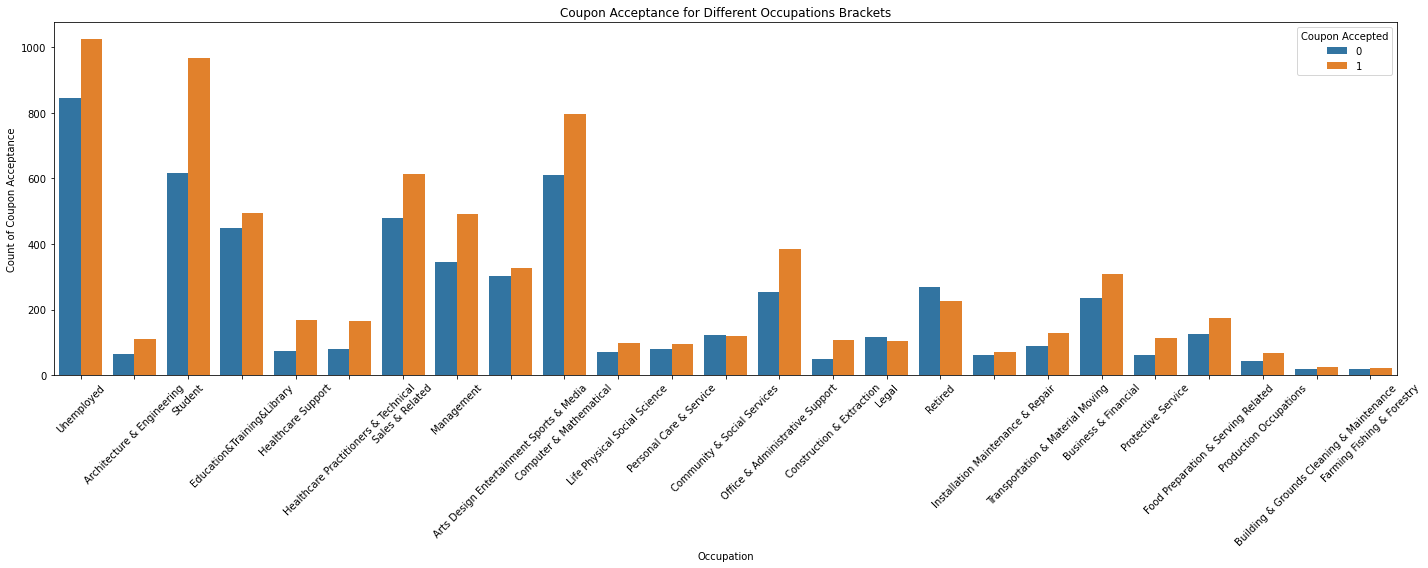

In [51]:
# choose a big figure for visibility
plt.figure(figsize=(20, 8))

sns.countplot(x='occupation', hue='Y', data=data)

plt.title('Coupon Acceptance for Different Occupations Brackets')
plt.xlabel('Occupation')
plt.ylabel('Count of Coupon Acceptance')

# rotate the x-axis for readability
plt.xticks(rotation=45)
plt.legend(title='Coupon Accepted', loc='upper right')
plt.tight_layout()
plt.show()

This graph reveals some intriguing insights:

1. High Acceptance Among the Unemployed: Unemployed individuals have the highest coupon acceptance rate. This is understandable, as they have limited income and any discount would provide significant financial relief.

2. Students vs. Architecture and Engineering: There is a notable disparity in coupon acceptance rates between students and individuals in Architecture and Engineering. Students, who generally have no income, are more likely to appreciate and use coupons to save money.

3. Blue-Collar vs. White-Collar Jobs: Blue-collar workers tend to accept fewer coupons. This could be because they are less engaged with the digital world, where most marketing and advertisements take place. On the other hand, white-collar professionals are more immersed in media and technology, making them more exposed to digital advertisements and hence more likely to use coupons.

***5. What is the average acceptance and corresponding count within a certain group of age and income?***

In [55]:
# find the average and the frequency of acceptance rate given groupy of occupation and income
acceptance_rateCounts_by_group = data.groupby(['occupation', 'income', 'age'])['Y'].agg(['mean', 'count']).reset_index()

# rename the columns
acceptance_rateCounts_by_group.rename(columns={'mean': 'Acceptance_Rate', 'count': 'Total_Count'}, inplace=True)

# sort the value in descending values
sorted_group = acceptance_rateCounts_by_group.sort_values(by='Acceptance_Rate', ascending=False)

In [58]:

fig = px.bar(
    sorted_group,
    x='age',
    y='Acceptance_Rate',
    color='income',
    title='Coupon Acceptance Rate by Age and Annual Income',
    labels={'Acceptance_Rate': 'Acceptance Rate', 'age': 'Age', 'annual_income': 'Annual Income'}
)

fig.update_layout(
    xaxis_title='Age',
    yaxis_title='Acceptance Rate',
    legend_title='Annual Income',
    xaxis_tickangle=-45,  # Rotate the x-axis labels
    barmode='group',
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="right",
        x=1.01
    ),
    autosize=False,
    width=2500,
    height=1000
)
fig.show()

This graph presents a combination of grouped data, showing the average acceptance rate and count for each group based on occupation, income, and age. Key observations include:

1. Low-Income Individuals and Bar Life: People with low incomes tend to enjoy bar life more and have a higher count of coupon acceptance.

2. Income Below 12,500: Individuals earning less than $12,500 are most likely underage, resulting in a lower acceptance rate due to their limited participation in bar activities.

These insights highlight the correlation between income levels and coupon acceptance, particularly in relation to social activities like visiting bars.

***6.coupon acceptance when we segment by passenger and coupon type.***

In [60]:
pass_data = data['passanger'].value_counts().reset_index().sort_values(by = 'count', ascending = False)
pass_data

,passanger,count
0,Alone,7305
1,Friend(s),3298
2,Partner,1075
3,Kid(s),1006


In [64]:
coupon_accep_noaccept_prob_pass_data = None
for passng in pass_data.iloc[:, 0]:
    coupon_accepted_type_pass_prob_data = (data.query('passanger == @passng & Y == 1').groupby('coupon')[['Y']].count() \
        / data.query('passanger == @passng').groupby('coupon')[['Y']].count()) * 100
    coupon_noaccepted_type_pass_prob_data = (data.query('passanger == @passng & Y == 0').groupby('coupon')[['Y']].count() \
        / data.query('passanger == @passng').groupby('coupon')[['Y']].count()) * 100
    
    coupon_accepted_type_pass_prob_data['Accepted'] = 'Yes'
    coupon_noaccepted_type_pass_prob_data['Accepted'] = 'No'
    coupon_accepted_type_pass_prob_data['passanger'] = passng
    coupon_noaccepted_type_pass_prob_data['passanger'] = passng
   
    coupon_accep_noaccept_prob_pass_data = pd.concat(
        [coupon_accepted_type_pass_prob_data, 
        coupon_noaccepted_type_pass_prob_data,
        coupon_accep_noaccept_prob_pass_data]
    )
    
coupon_accep_noaccept_prob_pass_data = coupon_accep_noaccept_prob_pass_data.reset_index().sort_values(by = ['Y'], ascending = [False])

Text(0.5, 0.98, 'Coupon Probability By Coupon Type and Passanger with AceptedCoupon in (1,0)')

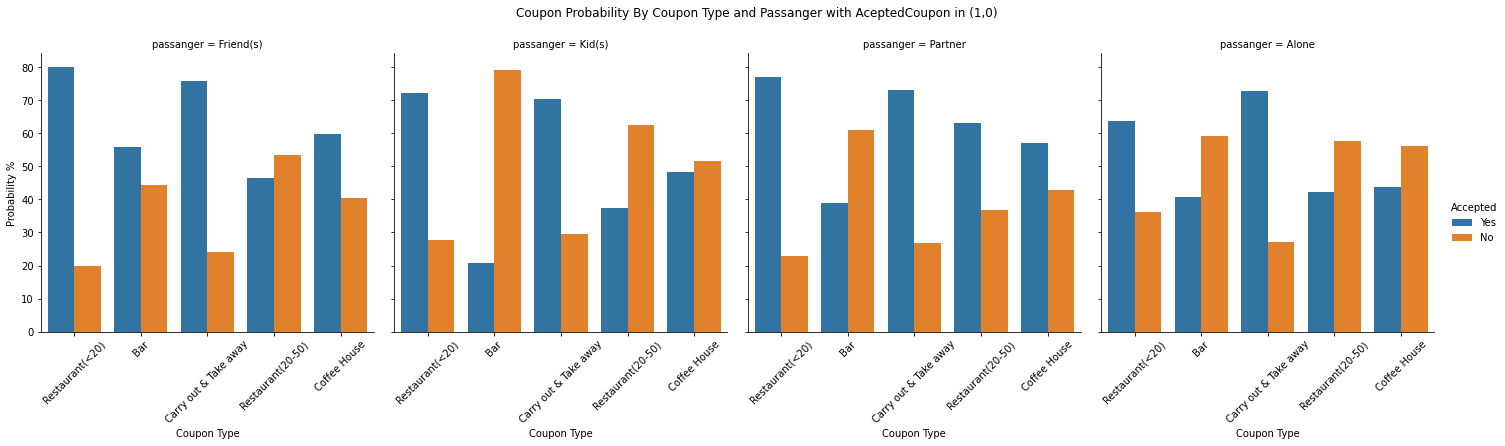

In [68]:
fig = sns.catplot(
    x="coupon", 
    data=coupon_accep_noaccept_prob_pass_data, 
    y="Y", 
    col='passanger', 
    hue="Accepted",
    kind="bar")
fig.set_axis_labels("Coupon Type", "Probability %")
fig.set_xticklabels(rotation=45)
fig.fig.subplots_adjust(top=0.85)
fig.fig.suptitle('Coupon Probability By Coupon Type and Passanger with AceptedCoupon in (1,0)')

We can deduce that the most accepted coupons for all passenger types are 'Restaurant(<20)' and 'Carry out & Take away'. A notable observation is that the 'Bar' coupon type is frequently rejected when the passenger is 'Kid(s)', which is understandable since children cannot enter establishments serving alcoholic beverages, and drivers tend to ignore these coupons for that reason. Overall, the 'Bar' coupon is the least likely to be accepted across all passenger categories, except for the 'Friend' category.

### Conclusion

1. The analysis and visualization of probability distributions highlight a distinct difference between drivers who accept coupons and those who do not. Factors such as job type, age range, and yearly income, when combined, seem to significantly influence coupon acceptance rates. Our observations show that individuals from specific professional backgrounds and financial standings are more likely to accept coupons. Notably, acceptance rates vary across different age groups, emphasizing that age plays a critical role in drivers' decisions to accept coupons.

2. Based on these insights, data-driven marketing strategies can be developed. For instance, younger customers aged 21 to 26, as well as those with very low incomes (below $12,500) or very high incomes (above $100,000 annually), show higher receptivity to coupon offers. Although it is uncertain whether this is due to effective marketing or inherent characteristics of the variables, it suggests the necessity of creating and implementing market strategies to target these two groups for maximizing profits.

3. The coupons 'Restaurant(<20)' and 'Carry out & Take away' has a higher probability of being accepted, 'Bar' is among the coupons that tend less likely to be accepted by condcutors. The driver with a 'friend(s)' passenger type is the most likely to accept the coupon, while the 'Kid(s)' type is the least likely.

4. In summary, comprehending these probability distributions that drive the trends is essential for developing predictive models for future coupon distribution strategies. This approach will enable more strategic marketing investments and yield better results.